
# Training a Decision Tree or a Random Forest on a classification problem, and compare the latter with using adaBoost

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris**


## 1. Decision Trees with SciKit-Learn on a very simple dataset

**We will first work on very simple classic dataset: Iris, which is a classification problem corresponding to determination of iris flower sub-species based on a few geometric characteristics of the flower.**

**Please FIRST READ the [*Iris DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py).**
In this classification problem, there are 3 classes, with a total of 150 examples (each one with 4 input). Please **now execute code cell below to load and view the dataset**.


In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

# Load Iris classification dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Print all 150 examples
print("(Number_of_examples, example_size) = " , iris.data.shape, "\n")
for i in range(0, 150) :
    print('Input = ', iris.data[i], ' , Label = ', iris.target[i] )


(Number_of_examples, example_size) =  (150, 4) 

Input =  [5.1 3.5 1.4 0.2]  , Label =  0
Input =  [4.9 3.  1.4 0.2]  , Label =  0
Input =  [4.7 3.2 1.3 0.2]  , Label =  0
Input =  [4.6 3.1 1.5 0.2]  , Label =  0
Input =  [5.  3.6 1.4 0.2]  , Label =  0
Input =  [5.4 3.9 1.7 0.4]  , Label =  0
Input =  [4.6 3.4 1.4 0.3]  , Label =  0
Input =  [5.  3.4 1.5 0.2]  , Label =  0
Input =  [4.4 2.9 1.4 0.2]  , Label =  0
Input =  [4.9 3.1 1.5 0.1]  , Label =  0
Input =  [5.4 3.7 1.5 0.2]  , Label =  0
Input =  [4.8 3.4 1.6 0.2]  , Label =  0
Input =  [4.8 3.  1.4 0.1]  , Label =  0
Input =  [4.3 3.  1.1 0.1]  , Label =  0
Input =  [5.8 4.  1.2 0.2]  , Label =  0
Input =  [5.7 4.4 1.5 0.4]  , Label =  0
Input =  [5.4 3.9 1.3 0.4]  , Label =  0
Input =  [5.1 3.5 1.4 0.3]  , Label =  0
Input =  [5.7 3.8 1.7 0.3]  , Label =  0
Input =  [5.1 3.8 1.5 0.3]  , Label =  0
Input =  [5.4 3.4 1.7 0.2]  , Label =  0
Input =  [5.1 3.7 1.5 0.4]  , Label =  0
Input =  [4.6 3.6 1.  0.2]  , Label =  0
Input = 

**Building, training and evaluating a simple Decision Tree classifier**

The SciKit-learn class for Decision Tree classifiers is sklearn.tree.DecisionTreeClassifier.

**Please FIRST READ (and understand!) the [*DecisionTreeClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to understand all parameters of the contructor.**

**You can then begin by running the code block below, in which default set of parameter values has been used.** If graphical view works, look at the structure of the learnt decision tree.

**Then, check the influence of MAIN parameters for Decision Tree classifier, i.e.:**
 - **homegeneity criterion ('gini' or 'entropy')**
 - **max_depth**
 - **min_samples_split**
 
NB : Note that post-training *PRUNING* IS unfortunately *NOT* implemented in SciKit-Learn Decision-Trees :(

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


DecisionTreeClassifier(max_depth=10, min_impurity_split=1e-07, presort=False)
Acuracy (on test set) =  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


 CONFUSION MATRIX
[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]


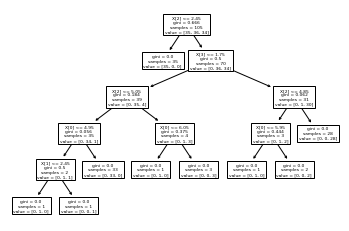

In [2]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test part
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Learn a Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, 
                                  min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_split=1e-07, class_weight=None, presort=False)
clf = clf.fit(X_train, y_train)

# Graphical view of learnt Decision Tree
tree.plot_tree(clf) 

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


## 2. Decision Trees on a  MORE REALISTIC DATASET: HANDWRITTEN DIGITS

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**

In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). Please **now execute code cell below to load the dataset, visualize a typical example, and train a Desicion Tree on it**. 
The original code uses a **voluntarily SUBOPTIMAL set of learning hyperparameters values, which reaches ~66% test acuracy. Try to play with them in order to improve acuracy.**


Number_of-examples =  1797

 Plot of first example


<Figure size 432x288 with 0 Axes>

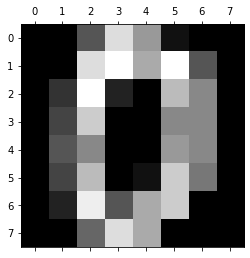

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=5,
                                              min_impurity_split=1e-07,
                                              min_samples_split=4,
                                              presort=False),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15],
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy')
Acuracy (on test set) =  0.9187986651835373
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.85      0.86      0.85        92
           2       0.86      0.87      0.87        85
           3       0.91      0.98      0.94        94
           4       0.91      0.92      0.91        95
           5       0.98      0.97      0.97        87
           6       0.96      0.96      0.96        92
           7       0.95      0.96      

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

# Split dataset into training and test part
X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)



# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )



__Question: According to the confusion matrices, what digits are the most confused with each other?__

__Answer:__
the most confused are (2,9) , (8,1) (2,3). 

**Finally, find somewhat optimized values for the set of 3 main hyper-parameters for DecisionTree learning, by using GRID-SEARCH WITH CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session). __Put the code in the cell below:__

In [8]:
#gridsearch 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'criterion': [ ('gini'),('entropy')], 
   'max_depth':[5,10,15],
   'min_samples_split': [ 2,3,4]}
 ]


# Create and train a Decision Tree Classifier
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                  min_samples_split=4, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_split=1e-07, class_weight=None, presort=False),param_grid, scoring='accuracy',cv=3)
clf = clf.fit(X_train, y_train)


# best params: 

print("Best parameters set found on development set:")
print()
print(clf.best_params_)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )




/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease par

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease par

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3}
GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=5,
                                              min_impurity_split=1e-07,
                                              min_samples_split=4,
                                              presort=False),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15],
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy')
Acuracy (on test set) =  0.8387096774193549
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        89
           1       0.86      0.75      0.80        92
           2       0.75      0.82      0.79        85
           3       0.80      0.82      0.81        94
           4       0.90      0.85      0.88        95
           5       0.90      0.84 

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease par

__Question: What best value have you managed to reach for TEST accuracy of your DecisionTree after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__
les meilleurs hyperparamètre sont:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3}
et l'accuracy max est 84%. 

In order to improve result, the most natural step is to combine SEVERAL decision trees, using the Ensemble model called Random Forest: see below

## 3. Building, training and evaluating a Random Forest classifier

The SciKit-learn class for Random Forest classifiers is sklearn.ensemble.RandomForestClassifier.

**Please FIRST READ (and understand!) the [*RandomForestClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to understand all parameters of the contructor.**

**Then you can begin by running the code block below, in which default set of parameter values has been used.** As you will see, a RandomForest (even rather small) can easily outperform single Decision Tree. 

**Then, check the influence of MAIN parameters for Random Forest classifier, i.e.:**
 - **n_estimators (number of trees in forest)**
 - **max_depth**
 - **max_features (max number of features used in each tree)**


In [19]:
from sklearn.ensemble import RandomForestClassifier



# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=64,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=10, 
                             max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=None, 
                             verbose=0, warm_start=False, class_weight=None)
clf = clf.fit(X_train, y_train)
print("n_estimators=", clf.n_estimators, " max_depth=",clf.max_depth,
      "max_features=", clf.max_features)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


n_estimators= 20  max_depth= 64 max_features= 10
RandomForestClassifier(max_depth=64, max_features=10, min_impurity_split=1e-07,
                       n_estimators=20, n_jobs=1)
Acuracy (on test set) =  0.9543937708565072
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       0.93      0.96      0.94        92
           2       0.98      0.95      0.96        85
           3       0.96      0.94      0.95        94
           4       0.95      0.97      0.96        95
           5       0.98      0.97      0.97        87
           6       1.00      0.98      0.99        92
           7       0.98      0.99      0.98        91
           8       0.88      0.91      0.89        88
           9       0.92      0.90      0.91        86

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899


 CONFUSION MATRIX

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

**Finally, find somewhat optimized values the set of 3 main hyper-parameters for RandomForest, by using CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session). __Put the code in the cell below:__

In [18]:

#using cross validation: 
#gridsearch 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'n_estimators': [5,10,20], 
   'max_depth':[5,10,15],
   'max_features': [ 2,3,4,5,6,7,8,9,10]}
 ]


# Create and train a Decision Tree Classifier
clf = GridSearchCV(RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=64,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='log2', 
                             max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=None, 
                             verbose=0, warm_start=False, class_weight=None),param_grid, scoring='accuracy',cv=3)
clf = clf.fit(X_train, y_train)


# best params: 

print("Best parameters set found on development set:")
print()
print(clf.best_params_)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

Best parameters set found on development set:

{'max_depth': 10, 'max_features': 7, 'n_estimators': 20}
GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=64, max_features='log2',
                                              min_impurity_split=1e-07,
                                              n_estimators=20, n_jobs=1),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [5, 10, 20]}],
             scoring='accuracy')
Acuracy (on test set) =  0.9566184649610678
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.93      0.98      0.95        92
           2       0.99      0.96      0.98        85
           3       0.99      0.91      0.95        94
           4       0.93      0.98      0.95        95
           5       0.99      0.97      0.98        87
           6 

/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/Users/mathieulebgdu93/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_

__Question: What best value have you managed to reach for TEST accuracy of your RandomForest after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__
best value: 0.9566184649610678
best parameters: {'max_depth': 10, 'max_features': 7, 'n_estimators': 20}

## 3. Building, training and evaluating an AdaBoost classifier

The SciKit-learn class for adaBoost is sklearn.ensemble.AdaBoostClassifier.

**Please FIRST READ (and understand!) the [*AdaBoostClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) to understand all parameters of the contructor.**

**Then begin by running the code block below, in which a default set of parameter values has been used.** 

**Then, check the influence of MAIN parameters for adaBoost classifier, i.e.:**
 - **base_estimator (ie type of Weak Classifier/Learner)** 
 - **n_estimators (number of boosting iterations, and therefore also number of weak classifiers)**
 - algorithm
 
**Finally, check which other types of classifiers can be used as Weak Classifier with the adaBoost implementation of SciKit-Learn.**
NB: in principle it is possible to use MLP classifiers as weak classifiers, but not with SciKit-learn implementation of MLPClassifier (because weighting of examples is not handled by its implementation).

Weak_learner: RandomForestClassifier(max_depth=6)
Weights of weak classifiers:  [ 6.79009724  9.67990641 12.49328336 15.20133131 17.50391617 19.40103613
 21.19279559 23.71852423 26.3087914  28.61137649 31.31942669 33.62201179
 35.2314497  38.92032915 39.43115478 39.86193769 36.08084142 19.33695893
 13.99522688 19.40364366 21.41640022 19.87004573 22.73602676 29.53023574
 38.04663354 30.05699353 32.07993906 51.12640493 36.64624796 38.98766567
 45.90746366 41.35112072 40.72375979 41.05188322 34.27418341]


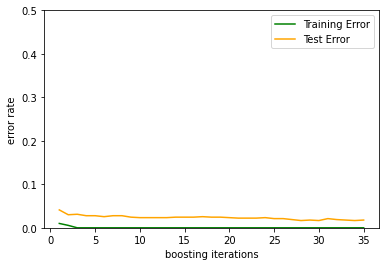

n_estimators= 35
Acuracy (on test set) =  0.982202447163515
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.97      1.00      0.98        92
           2       1.00      0.98      0.99        85
           3       0.99      0.97      0.98        94
           4       1.00      0.99      0.99        95
           5       1.00      0.98      0.99        87
           6       1.00      0.98      0.99        92
           7       0.97      0.99      0.98        91
           8       0.95      0.95      0.95        88
           9       0.96      0.99      0.97        86

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899


 CONFUSION MATRIX
[[89  0  0  0  0  0  0  0  0  0]
 [ 0 92  0  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  1  1  0]
 [ 1  0  0 91  0  0  0  0  2  0]
 [ 0  0  0  0 94  0  0  1  0  

In [21]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train an adaBoost classifier using SMALL Decision Trees as weak classifiers
weak_learner = RandomForestClassifier(max_depth=6)
clf = AdaBoostClassifier(weak_learner, n_estimators=35, learning_rate=1.0, algorithm='SAMME', 
                         random_state=None)
clf = clf.fit(X_train, y_train)
print("Weak_learner:", clf.base_estimator)
print("Weights of weak classifiers: ", clf.estimator_weights_)
      
# Plot training curves (error = f(iterations))
n_iter = clf.n_estimators
from sklearn.metrics import zero_one_loss
ada_train_err = np.zeros((clf.n_estimators,))
for i, y_pred in enumerate(clf.staged_predict(X_train)):
    ada_train_err[i] = zero_one_loss(y_pred, y_train)
ada_test_err = np.zeros((clf.n_estimators,))
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    ada_test_err[i] = zero_one_loss(y_pred, y_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n_iter) + 1, ada_train_err,
        label='Training Error',
        color='green')
ax.plot(np.arange(n_iter) + 1, ada_test_err,
        label='Test Error',
        color='orange')
ax.set_ylim((0.0, 0.5))
ax.set_xlabel('boosting iterations')
ax.set_ylabel('error rate')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()

# Evaluate acuracy on test data
print("n_estimators=", clf.n_estimators)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

__Question:__ Looking at the training curves, you can see that **training error goes down to zero rather quickly, but that test_error still continues, after training error is zero, to diminish with increasing iterations**. __Is it normal, and why?__ (check the course!)

__Answer:__
la train erro est devenu nul mais la test error continue de diminuer car il y a plusieurs manière de séparé deux classes, adaboost va chercher de meilleur manière, de différnetes manière même une fois qu'elles ont été séparé parfaitement. son objectif étant d'augmenter la marge entre les deux classes même si les séparations sont parfaites ! 

**Now, for the case of _DecisionTree_ weak classifiers, find somewhat optimized values of (max_depth, n_estimators) by using CROSS-VALIDATION.** __Put the code below:__

In [39]:
#using cross validation: 
#gridsearch 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


weak_learner = RandomForestClassifier(max_depth=6)

param_grid = [
  { 'n_estimators':[15,35], 
 'base_estimator__max_depth':[1,5,10,15]}
 ]


# Create and train a Decision Tree Classifier
clf = GridSearchCV(AdaBoostClassifier(weak_learner, n_estimators=35, learning_rate=1.0, algorithm='SAMME', 
                         random_state=None),param_grid, scoring='accuracy',cv=3)
clf = clf.fit(X_train, y_train)


# best params: 

print("Best parameters set found on development set:")
print()
print(clf.best_params_)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )






Best parameters set found on development set:

{'base_estimator__max_depth': 10, 'n_estimators': 15}
GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=RandomForestClassifier(max_depth=6),
                                          n_estimators=35),
             param_grid=[{'base_estimator__max_depth': [1, 5, 10, 15],
                          'n_estimators': [15, 35]}],
             scoring='accuracy')
Acuracy (on test set) =  0.9710789766407119
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.95      0.97      0.96        92
           2       1.00      0.99      0.99        85
           3       1.00      0.97      0.98        94
           4       0.98      0.98      0.98        95
           5       0.94      0.97      0.95        87
           6       1.00      0.99      0.99        92
           7       0.98      0

__Question: What best value have you managed to reach for TEST accuracy of your AdaboostClassifier after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer:__mes meilleurs paramètre sont: {'base_estimator__max_depth': 10, 'n_estimators': 15}
et une accuracy de:0.9710789766407119